# Traditional Machine Learning Algorithms

## K Nearest Neighbors (KNN)

Imagine you have a bunch of friends, each with different interests. Now, you meet a new person and want to figure out what they might like based on who they're similar to.

KNN, or k-Nearest Neighbors, works similarly. It's like asking your friends who are most similar to the new person and then guessing what they might like based on what those similar friends enjoy.

**Here's how it works:**
1.	Finding Neighbors: You look at the data points (your friends) closest to the new point (the new person) in the feature space (interests).
2.	Majority Rule: Then, you see what the majority of those closest points are (what your similar friends like), and that's what you guess the new person might like.

#

<img src='images\knn.png' width = 600px>

**Advantages:**
- Simple and easy to understand.
- No training phase (it doesn't really "learn" from the data; it just memorizes it), so it's quick to implement.

**Disadvantages:**
- Computationally expensive during testing because it needs to compare the new data point with all existing data points.
- Sensitive to irrelevant features or noisy data.
- Requires a meaningful distance metric (like Euclidean distance), which might be challenging to define in some cases.
  
**Why "Lazy" Algorithm?**
- It's called a "lazy" algorithm because it doesn't do any real work until you give it a new data point to classify. It just stores the data and waits until you ask for a prediction.
- KNN does not learn any discriminative function from the training data. But it memorizes the entire training dataset instead.
- There is no training time in KNN. But, this skipping of training time comes with a cost.
Each time a new data point comes in and we want to make a prediction, the KNN algorithm will search for the nearest neighbors in the entire training set.
- Hence the prediction step becomes more time-consuming and computationally expensive



In [1]:
from sklearn.neighbors import KNeighborsClassifier
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [2]:
# Create the dataset
data = {
    'x1': [-1, -3, -3, -3, 1.5, 2, 3],
    'x2': [0, 0, -2, 2, 0, -1, 1],
    'Class': ['Square', 'Square', 'Square', 'Square', 'Triangle', 'Triangle', 'Triangle']
}

unknown_point = pd.DataFrame({'x1':[0], 'x2': [0]})


# Create DataFrame
df = pd.DataFrame(data)

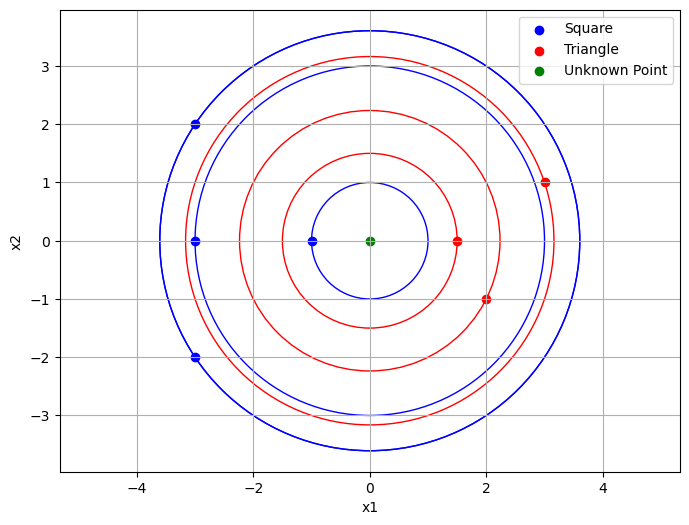

In [3]:
# Plot the points
plt.figure(figsize=(8, 6))
plt.scatter(df[df['Class'] == 'Square']['x1'], df[df['Class'] == 'Square']['x2'], color='blue', label='Square')
plt.scatter(df[df['Class'] == 'Triangle']['x1'], df[df['Class'] == 'Triangle']['x2'], color='red', label='Triangle')
plt.scatter(unknown_point['x1'], unknown_point['x2'], color='green', label='Unknown Point')

# Plot circles around square class points
for i, row in df.iterrows():
    dist = np.sqrt((row['x1'] - unknown_point['x1'].values[0])**2 + (row['x2'] - unknown_point['x2'].values[0])**2)
    circle = plt.Circle((unknown_point['x1'].values[0], unknown_point['x2'].values[0]), dist, color='blue' if row['Class'] == 'Square' else 'red', fill=False)
    plt.gca().add_patch(circle)

plt.xlabel('x1')
plt.ylabel('x2')
plt.legend()
plt.grid(True)
plt.axis('equal')
plt.show()

In [4]:
knn1 = KNeighborsClassifier(n_neighbors=1)
knn3 = KNeighborsClassifier(n_neighbors=3)
knn7 = KNeighborsClassifier(n_neighbors=7)

In [5]:
knn1.fit(df[['x1', 'x2']], y=df['Class'])
knn3.fit(df[['x1', 'x2']], y=df['Class'])
knn7.fit(df[['x1', 'x2']], y=df['Class'])

KNeighborsClassifier(n_neighbors=7)

In [6]:
print("Predicted class using k=1:", knn1.predict(unknown_point))
print("Predicted class using k=3:", knn3.predict(unknown_point))
print("Predicted class using k=7:", knn7.predict(unknown_point))


Predicted class using k=1: ['Square']
Predicted class using k=3: ['Triangle']
Predicted class using k=7: ['Square']


## Decision Trees

A decision tree is a supervised learning algorithm that is used for classification and regression modeling. Regression is a method used for predictive modeling, so these trees are used to either classify data or predict what will come next. 

Decision trees look like flowcharts, starting at the root node with a specific question of data, that leads to branches that hold potential answers. The branches then lead to decision (internal) nodes, which ask more questions that lead to more outcomes. This goes on until the data reaches what’s called a terminal (or “leaf”) node and ends.

Decision trees are preferred for many applications, mainly due to their high explainability, but also due to the fact that they are relatively simple to set up and train, and the short time it takes to perform a prediction with a decision tree. Decision trees are natural to tabular data, and, in fact, they currently seem to outperform neural networks on that type of data.

Imagine you're playing a game of 20 Questions. You think of an object, and your friend asks questions to guess what it is. Decision trees work a lot like this game.

**Here's how it works:**
1.	Branching Decisions: Think of each question your friend asks as a decision point in the tree. They might start by asking if it's alive or not. Depending on your answer, they'll ask a different follow-up question.
2.	Leaf Nodes: Eventually, after enough questions, your friend will make a guess. In a decision tree, these guesses are called leaf nodes. They represent the final prediction or outcome.

#

<img src='images\decision tree.png' width=300px center>

**Uses:**
- Decision trees are used for both classification and regression tasks. In classification, they predict the class label of a new data point. In regression, they predict the value of a continuous target variable.
- They're used in recommendation systems, fraud detection, and medical diagnosis.
  
**Advantages:**
- Easy to understand and interpret, just like playing 20 Questions.
- Can handle both numerical and categorical data.
- Requires little data preprocessing (like normalization) compared to other algorithms.

**Disadvantages:**
- Prone to overfitting, especially when the tree is deep and complex.
- Can be unstable because a small change in the data can result in a completely different tree.
- Not suitable for problems with complex relationships between features.

### CART Algorithm

To build a decision tree, the two most known algorithms are ID3 which uses a concept called information gain and Classification And Regression Trees (CART) algorithm being more popular which uses Gini index. We will dive deeper on how the CART algorithm works.

CART algorithm consists of two main steps:
1. Find Gini index of each attribute
2. Partition at Minimum Gini Index Values: We need the root node of the decision tree to have
the lowest possible Gini Inde

**So what is Gini index?**

- Gini index is a metric for classification tasks in CART
- Gini index or Gini impurity measures the degree or probability of a particular variable being wrongly classified

Gini Index is calculated through the following formula"
$$ Gini = 1 - \sum_{i=1}^{n} (p_{i})^2 $$

**And what is actually meant by ‘impurity’?**
- If all the elements belong to a single class, then it can be called pure
- The degree of Gini index varies from 0 to 1
  - Where 0 depicts that all the elements be allied to a certain class or only one class exists there
  - A of value as 1 signifies that all the elements are randomly distributed across various classes
  - A value of 0.5 denotes the elements are uniformly distributed into some classes


**Example, Consider the following data:**

| Day | Outlook  | Temperature | Humidity | Wind   | Decision |
| --- | -------- | ----------- | -------- | ------ | -------- |
| 1   | Sunny    | Hot         | High     | Weak   | No       |
| 2   | Sunny    | Hot         | High     | Strong | No       |
| 3   | Overcast | Hot         | High     | Weak   | Yes      |
| 4   | Rain     | Mild        | High     | Weak   | Yes      |
| 5   | Rain     | Cool        | Normal   | Weak   | Yes      |
| 6   | Rain     | Cool        | Normal   | Strong | No       |
| 7   | Overcast | Cool        | Normal   | Strong | Yes      |
| 8   | Sunny    | Mild        | High     | Weak   | No       |
| 9   | Sunny    | Cool        | Normal   | Weak   | Yes      |
| 10  | Rain     | Mild        | Normal   | Weak   | Yes      |
| 11  | Sunny    | Mild        | Normal   | Strong | Yes      |
| 12  | Overcast | Mild        | High     | Strong | Yes      |
| 13  | Overcast | Hot         | Normal   | Weak   | Yes      |
| 14  | Rain     | Mild        | High     | Strong | No       |

Step 1: Calculate the Gini index for the attribute "Outlook""

- For "Sunny": 5 instances (2 No, 3 Yes)

- For "Overcast": 4 instances (0 No, 4 Yes)

- For "Rain": 5 instances (3 No, 2 Yes)

The Gini index for the Outlook attribute can be calculated as follows:
$$ Gini(Outlook=Sunny) = 1 - \left( \frac{2}{5} \right)^2 + \left( \frac{3}{5} \right)^2 = 1 - 0.16 - 0.36 = 0.48$$

$$ Gini(Outlook=Overcast) = 1 - \left( \frac{4}{4} \right)^2 + \left( \frac{0}{4} \right)^2 = 0 $$

$$ Gini(Outlook=Rain) = 1 - \left( \frac{3}{5} \right)^2 + \left( \frac{2}{5} \right)^2 = 1 - 0.16 - 0.36 = 0.48$$

Step 2: Calculate the weighted sum of Gini indexes for "Outlook" feature:

$$ Gini(Outlook) = 1 - \left( \frac{5}{14} \right)^2 \times 0.48 + \left( \frac{4}{14} \right)^2 \times 0 + \left( \frac{5}{14} \right)^2 \times 0.48 =0.342 $$

Step 3: Repeat steps 1 and 2 for each attribute:
| Feature     | Gini Index |
| ----------- | ---------- |
| Outlook     | 0.342      |
| Temperature | 0.439      |
| Humidty     | 0.367      |
| Wind        | 0.428      |

**While building the decision tree, we would prefer choosing the attribute with the least Gini
index as the root node**

So let's split the table on the Outlook Feature, it will look something like this:

<img src="images\outlook.png" width='500px'>

We can see that when the Outlook is "Overcast" the Decision is always Yes, so we can generalize that whenever the outlook is overcast we predict the decision to be yes.

<img src="images\outlook_generalized.png" width='500px'>


Now, we will repeat the steps until we have tables with only one class of decision:

**Outlook = Sunny**
| Feature     | Gini Index |
| ----------- | ---------- |
| Temperature | 0.2        |
| Humidty     | 0          |
| Wind        | 0.466      |

#

<div style="display: flex;">
    <img src="images\sunny 1.png" alt="Image 1" style="width: 48%; ; margin-right:2%;">
    <img src="images\sunny 2.png" alt="Image 2" style="width: 48%;">
</div>

#

| Feature     | Gini Index |
| ----------- | ---------- |
| Temperature | 0.466      |
| Humidty     | 0.466      |
| Wind        | 0          |

#

<div style="display: flex;">
    <img src="images\rain 1.png" alt="Image 1" style="width: 48%; ; margin-right:2%;">
    <img src="images\rain 2.png" alt="Image 2" style="width: 48%;">
</div>

the image above to the right would be our decision tree since we reached leaf nodes, i.e., we can make a decision when we reach these nodes.


<i><p style="font-size:16px; border: 2px solid black; margin: 20px; padding: 20px;">Unfortunately, there is not a yet an implementation of decision trees that supports categorical data in python. The available implementations are binary trees, i.e., they can only have 2 children, so the final tree will look different than what we got.

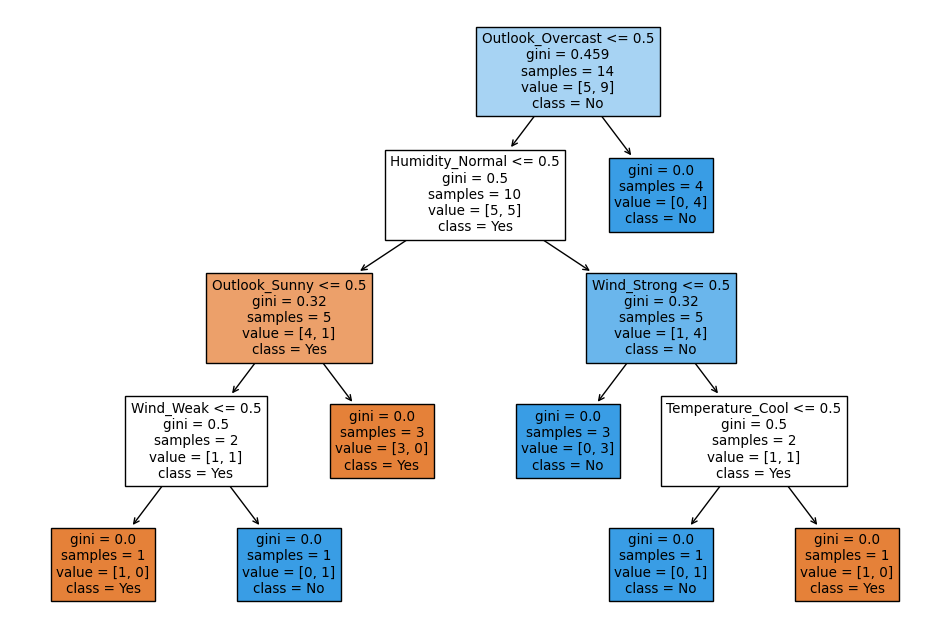

In [1]:
from sklearn.tree import DecisionTreeClassifier, plot_tree
import matplotlib.pyplot as plt
import pandas as pd


df = pd.read_csv("data\\Sample data.csv", index_col="Day")

df = pd.get_dummies(df, columns=['Outlook', 'Temperature', 'Humidity', 'Wind'])
clf = DecisionTreeClassifier()

y = df["Decision"]
X = df.drop(columns=["Decision"])

clf.fit(X, y)

# Plot the decision tree
plt.figure(figsize=(12, 8))
plot_tree(clf, filled=True, feature_names=X.columns, class_names=["Yes", "No"])
plt.show()


<i><p style="font-size:16px; border: 2px solid black; margin: 20px; padding: 20px;">There are other tools to fit a decision tree such as the [Weka project](https://www.cs.waikato.ac.nz/~ml/weka/), it contains many other machine learning algorithms that you can experiment with.

#

Here is another example of a decision tree

1.0


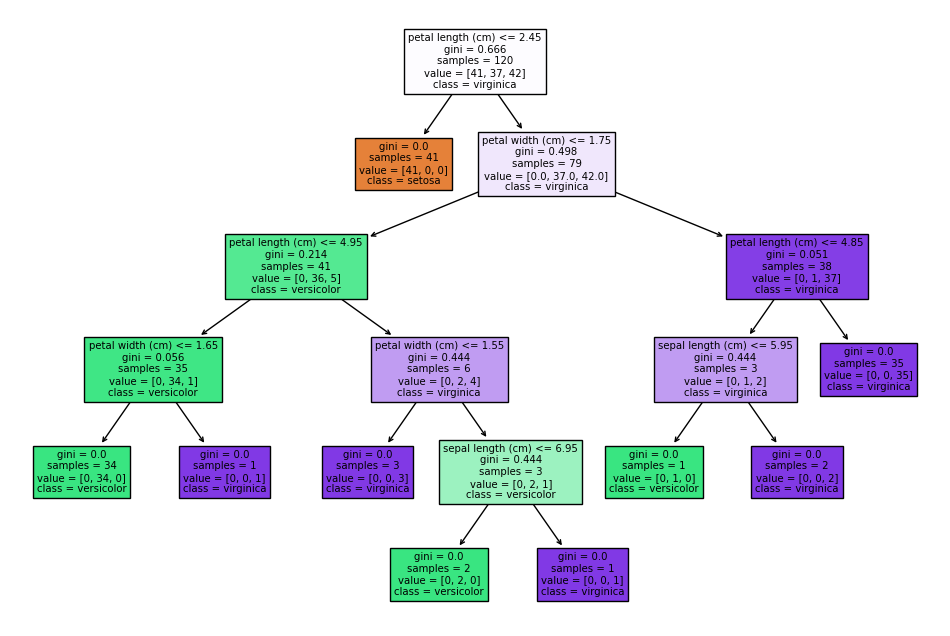

In [8]:
from sklearn.datasets import load_iris
from sklearn.model_selection import train_test_split

# Load the iris dataset
iris = load_iris()
X = iris.data
y = iris.target

X_train, X_test, y_train, y_test = train_test_split(
        X, y, test_size=0.2, random_state=1234
    )

# Fit the decision tree model
clf = DecisionTreeClassifier()
clf.fit(X_train, y_train)

predictions = clf.predict(X_test)

def accuracy(y_pred, y_test):
    return np.sum(y_test == y_pred) / len(y_test)
    
acc = accuracy(y_test, predictions)
print(acc)

# Plot the decision tree
plt.figure(figsize=(12, 8))
plot_tree(clf, filled=True, feature_names=iris.feature_names, class_names=iris.target_names)
plt.show()